# ENSO Analysis

## ENSO First Dataset

### Data Validation

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### tao-all dataset

In [198]:
# Getting columns names for tao-all dataset
tao_col = open('../data/tao-all2.col', 'r')
col_names_tao = tao_col.readlines()
col_names_tao

['obs\n',
 'year\n',
 'month\n',
 'day\n',
 'date\n',
 'latitude\n',
 'longitude\n',
 'zon.winds\n',
 'mer.winds\n',
 'humidity\n',
 'air temp.\n',
 's.s.temp.\n']

In [199]:
col_names_tao = [i.replace('\n', '') for i in col_names_tao]

In [200]:
# Loading tao-all2.dat file
tao = pd.read_csv('../data/tao-all2.dat', sep = '\s+', names = col_names_tao, header = None)
# Renaming columns
tao.rename(columns = {'zon.winds':'zonal_winds', 'mer.winds':'meridional_winds', 'air temp.':'air_temperature', 's.s.temp.':'sea_surface_temperature'}, inplace = True)

In [201]:
tao.head()

,obs,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [202]:
# Replacing . for nan
tao.replace('.', np.nan, inplace = True)

In [ ]:
tao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   year                     178080 non-null  int64         
 1   month                    178080 non-null  int64         
 2   day                      178080 non-null  int64         
 3   date                     178080 non-null  datetime64[ns]
 4   latitude                 178080 non-null  float64       
 5   longitude                178080 non-null  float64       
 6   zonal_winds              152917 non-null  float64       
 7   meridional_winds         152918 non-null  float64       
 8   humidity                 112319 non-null  float64       
 9   air_temperature          159843 non-null  float64       
 10  sea_surface_temperature  161073 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 14.9 MB


In [203]:
# Changing columns to their appropiate type
col_types = {'date': str, 'zonal_winds': float, 'meridional_winds': float, 'humidity': float, 'air_temperature': float, 'air_temperature': float, 'sea_surface_temperature': float}
tao = tao.astype(col_types)
tao['date'] = pd.to_datetime(tao['date'], yearfirst = True)

In [205]:
# Counting number of different unique values in each column
tao.nunique()

obs                        178080
year                           19
month                          12
day                            31
date                         6371
latitude                      682
longitude                    1657
zonal_winds                   238
meridional_winds              216
humidity                      394
air_temperature              1184
sea_surface_temperature      1264
dtype: int64

* The *obs* column is a unique identifier of the observation, we can drop this column as it would not add any value to the analysis.

In [206]:
# Droping obs column
tao.drop(columns=['obs'], inplace = True)

In [207]:
# Searching for duplicated general dupliated rows and on date, latitude, longitude
print(tao.duplicated().any())
print(tao[['date', 'latitude', 'longitude']].duplicated().any())

False
False


* There are no duplicated rows in our dataset.

#### elnino dataset

In [208]:
# Getting columns names for elnino dataset
elnino_col = open('../data/elnino.col', 'r')
col_names_elnino = elnino_col.readlines()
col_names_elnino = [i.replace('\n', '') for i in col_names_elnino]
col_names_elnino

['buoy',
 'day',
 'latitude',
 'longitude',
 'zon.winds',
 'mer.winds',
 'humidity',
 'air temp.',
 's.s.temp.']

In [209]:
# Loading elnino file
elnino = pd.read_csv('../data/elnino', sep = '\s+', names = col_names_elnino, header = None)
# Renaming columns
elnino.rename(columns = {'zon.winds':'zonal_winds', 'mer.winds':'meridional_winds', 'air temp.':'air_temperature', 's.s.temp.':'sea_surface_temperature'}, inplace = True)

In [210]:
elnino.head()

,buoy,day,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85


In [211]:
# Replacing . for nan
elnino.replace('.', np.nan, inplace = True)

In [212]:
elnino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   buoy                     782 non-null    int64  
 1   day                      782 non-null    int64  
 2   latitude                 782 non-null    float64
 3   longitude                782 non-null    float64
 4   zonal_winds              677 non-null    object 
 5   meridional_winds         677 non-null    object 
 6   humidity                 624 non-null    object 
 7   air_temperature          684 non-null    object 
 8   sea_surface_temperature  709 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 55.1+ KB


* Since *buoy* is not a part of our larger dataset and it is an identifier of the buoy making the measurements we will drop this column. 

In [213]:
elnino.drop(columns = ['buoy'], inplace = True)

* The *elnino* dataset does not have a complete date for the observations on it, but we know the observations were made from 23 May 98 to 5 June 98; this means that we can get the dates of the observations as shown below.

In [214]:
elnino['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [215]:
# Dictionary to replace day column with correct day according to description
# May dictionary
may_keys = list(range(1,10))
may_values = [str(i) for i in list(range(23,32))]
may_dict = {may_keys[i] : may_values[i] for i in range(len(may_keys))}
# June dictionary
june_keys = list(range(10,15))
june_values = [str(0)+str(i) for i in list(range(1,6))]
june_dict = {june_keys[i] : june_values[i] for i in range(len(june_keys))}
# Complete dictionary
day_dict = may_dict | june_dict

In [216]:
# Replacing values of day columns with correct days 
elnino['day'].replace(day_dict, inplace = True)

In [217]:
# Inserting year column
elnino.insert(loc = 0, column = 'year', value = '98')

In [218]:
# Inserting month 
month_conditions = [
    elnino['day'].isin(may_values) ,
    elnino['day'].isin(june_values)
]

month_values = ['05', '06']
elnino.insert(loc = 1, column = 'month', value = np.select(month_conditions, month_values))

In [219]:
# Inserting date column
elnino['date'] = elnino['year'] + elnino['month'] + elnino['day']

In [220]:
# Changing order of columns
elnino = elnino.iloc[:,[0,1,2,10,3,4,5,6,7,8,9]]

In [221]:
# Changing columns to their appropiate type
col_types = {'year': int, 'month': int, 'day': int, 'zonal_winds': float, 'meridional_winds': float, 'humidity': float, 'air_temperature': float, 
             'air_temperature': float, 'sea_surface_temperature': float}
elnino = elnino.astype(col_types)
elnino['date'] = pd.to_datetime(elnino['date'], yearfirst = True)

In [222]:
# Counting number of different unique values in each column
elnino.nunique()

year                         1
month                        2
day                         14
date                        14
latitude                    88
longitude                  123
zonal_winds                113
meridional_winds           121
humidity                   179
air_temperature            321
sea_surface_temperature    328
dtype: int64

In [223]:
# Searching for duplicated general dupliated rows and on date, latitude, longitude
print(elnino.duplicated().any())
print(elnino[['date', 'latitude', 'longitude']].duplicated().any())

False
True


In [224]:
# Looking at duplicated rows
elnino[elnino[['date', 'latitude', 'longitude']].duplicated(keep = False)]

,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
328,98,5,28,1998-05-28,8.0,-179.91,NaN,NaN,NaN,27.98,28.38
329,98,5,28,1998-05-28,8.0,-179.91,NaN,NaN,NaN,27.86,28.41


* We know the observations were taken at the same time of day, which means that having two observations with the same *date*, *latitude* and *longitude* will mean the observations are the same observation and that if there is any diffence between it comes from some sort of error; hence we will average the columns with different values.

In [225]:
# Averaging duplicated values of the columns above
col_names = ['date', 'latitude', 'longitude']
summaries = {'year': 'first', 'month': 'first', 'day': 'first', 'zonal_winds' : 'first', 'meridional_winds' : 'first',
             'humidity': 'first', 'air_temperature':'mean', 'sea_surface_temperature' : 'mean'}
elnino = elnino.groupby(by=col_names).agg(summaries).reset_index()

In [226]:
elnino = elnino.iloc[:,[3,4,5,0,1,2,6,7,8,9,10]]

In [227]:
elnino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   year                     781 non-null    int32         
 1   month                    781 non-null    int32         
 2   day                      781 non-null    int32         
 3   date                     781 non-null    datetime64[ns]
 4   latitude                 781 non-null    float64       
 5   longitude                781 non-null    float64       
 6   zonal_winds              677 non-null    float64       
 7   meridional_winds         677 non-null    float64       
 8   humidity                 624 non-null    float64       
 9   air_temperature          683 non-null    float64       
 10  sea_surface_temperature  708 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int32(3)
memory usage: 58.1 KB


#### enso dataset

In [228]:
# Concatenating the datasets
enso = pd.concat([tao, elnino])

In [229]:
enso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178861 entries, 0 to 780
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   year                     178861 non-null  int64         
 1   month                    178861 non-null  int64         
 2   day                      178861 non-null  int64         
 3   date                     178861 non-null  datetime64[ns]
 4   latitude                 178861 non-null  float64       
 5   longitude                178861 non-null  float64       
 6   zonal_winds              153594 non-null  float64       
 7   meridional_winds         153595 non-null  float64       
 8   humidity                 112943 non-null  float64       
 9   air_temperature          160526 non-null  float64       
 10  sea_surface_temperature  161781 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 16.4 MB


In [230]:
enso = enso.sort_values(by='date')
enso.head()

,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
0,80,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,80,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,80,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,80,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,80,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


In [231]:
# Searching for duplicated general dupliated rows and on date, latitude, longitude
print(enso.duplicated().any())
print(enso[['date', 'latitude', 'longitude']].duplicated().any())

True
True


In [232]:
print(enso.duplicated().sum())

714


In [233]:
enso.drop_duplicates(inplace=True)

In [234]:
print(enso[['date', 'latitude', 'longitude']].duplicated().any())

True


In [235]:
# Looking at duplicated rows
enso[enso[['date', 'latitude', 'longitude']].duplicated(keep = False)].sort_values(by=['date','latitude'])

,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
48,98,5,23,1998-05-23,5.02,-94.95,NaN,NaN,88.6,27.50,NaN
120107,98,5,23,1998-05-23,5.02,-94.95,NaN,NaN,88.6,27.50,30.03
55,98,5,23,1998-05-23,8.05,-110.15,-3.9,-1.2,NaN,28.84,29.66
147178,98,5,23,1998-05-23,8.05,-110.15,-3.9,-1.2,86.4,28.84,29.66
120108,98,5,24,1998-05-24,5.02,-94.95,NaN,NaN,81.5,28.61,29.96
...,...,...,...,...,...,...,...,...,...,...,...
744,98,6,4,1998-06-04,8.05,-110.15,4.3,4.2,NaN,27.92,29.87
753,98,6,5,1998-06-05,-5.01,-139.92,NaN,NaN,NaN,27.44,28.85
128819,98,6,5,1998-06-05,-5.01,-139.92,-7.2,-0.4,85.0,27.44,28.85
772,98,6,5,1998-06-05,4.97,146.99,NaN,NaN,NaN,28.80,29.40


* For the same reason as before about the observations taken on the same time of day, we will average the columns with different values.

In [236]:
# Averaging duplicated values of the columns above
col_names = ['date', 'latitude', 'longitude']
summaries = {'year': 'first', 'month': 'first', 'day': 'first', 'zonal_winds' : 'mean', 'meridional_winds' : 'mean',
             'humidity': 'mean', 'air_temperature':'mean', 'sea_surface_temperature' : 'mean'}
enso = enso.groupby(by=col_names).agg(summaries).reset_index()

In [237]:
enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178113 entries, 0 to 178112
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     178113 non-null  datetime64[ns]
 1   latitude                 178113 non-null  float64       
 2   longitude                178113 non-null  float64       
 3   year                     178113 non-null  int64         
 4   month                    178113 non-null  int64         
 5   day                      178113 non-null  int64         
 6   zonal_winds              152938 non-null  float64       
 7   meridional_winds         152939 non-null  float64       
 8   humidity                 112340 non-null  float64       
 9   air_temperature          159870 non-null  float64       
 10  sea_surface_temperature  161100 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 14.9 MB


### EDA

In [238]:
# Setting the date column as index
enso_dt = enso.set_index('date')
enso_dt.head()

,latitude,longitude,year,month,day,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
date,,,,,,,,,,
1980-03-07,-0.02,-109.46,80,3,7,-6.8,0.7,NaN,26.14,26.24
1980-03-08,-0.02,-109.46,80,3,8,-4.9,1.1,NaN,25.66,25.97
1980-03-09,-0.02,-109.46,80,3,9,-4.5,2.2,NaN,25.69,25.28
1980-03-10,-0.02,-109.46,80,3,10,-3.8,1.9,NaN,25.57,24.31
1980-03-11,-0.02,-109.46,80,3,11,-4.2,1.5,NaN,25.30,23.19


#### Univariate analysis of numerical variables

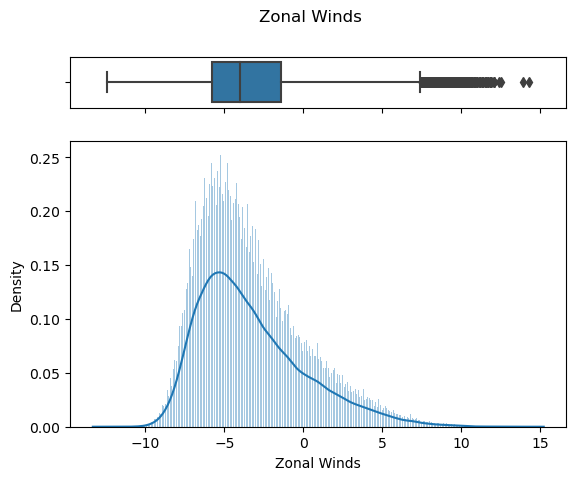

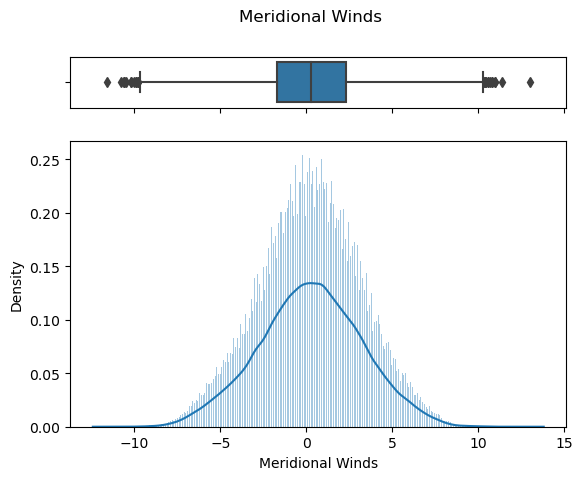

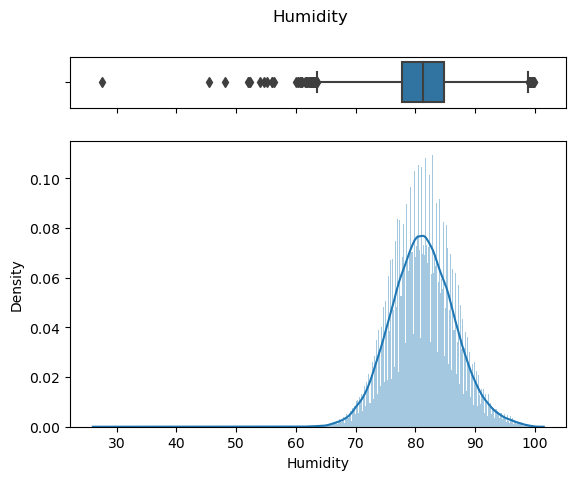

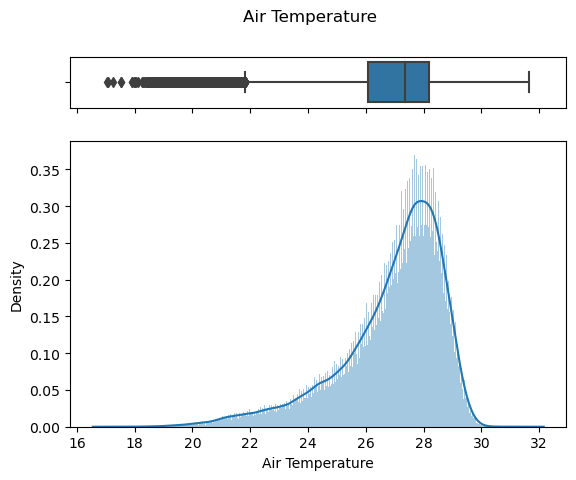

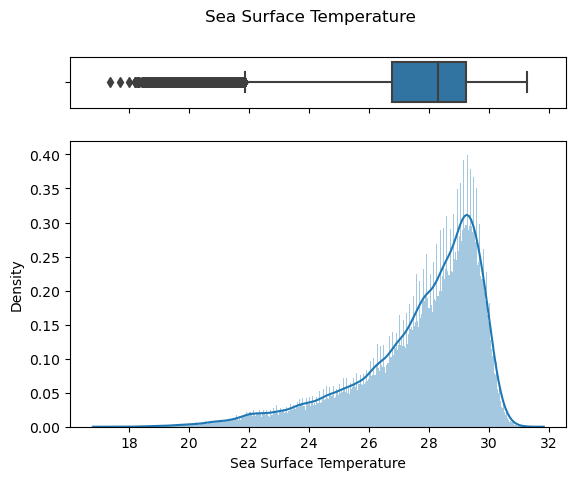

In [239]:
obs_var = ['zonal_winds', 'meridional_winds', 'humidity', 'air_temperature', 'sea_surface_temperature']
obs_names = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temperature', 'Sea Surface Temperature']
for i in range(len(obs_var)):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
    f.suptitle(obs_names[i])
    sns.boxplot(x=enso_dt[obs_var[i]], ax=ax_box, whis=2)
    ax_box.set(xlabel=None)
    sns.distplot(enso_dt[obs_var[i]], ax=ax_hist, bins=int(np.sqrt(len(enso))))
    ax_hist.set(xlabel=obs_names[i])
    plt.show()

In [240]:
enso_dt[obs_var].describe().T

,count,mean,std,min,25%,50%,75%,max
zonal_winds,152938.0,-3.304934,3.373344,-12.40,-5.80,-4.00,-1.40,14.30
meridional_winds,152939.0,0.249557,2.999102,-11.60,-1.70,0.30,2.30,13.00
humidity,112340.0,81.236746,5.315452,27.58,77.70,81.20,84.80,99.90
air_temperature,159870.0,26.887762,1.816363,17.05,26.06,27.34,28.18,31.66
sea_surface_temperature,161100.0,27.715516,2.057336,17.35,26.77,28.29,29.23,31.26


#### Bivariate analysys and multivariate analysis

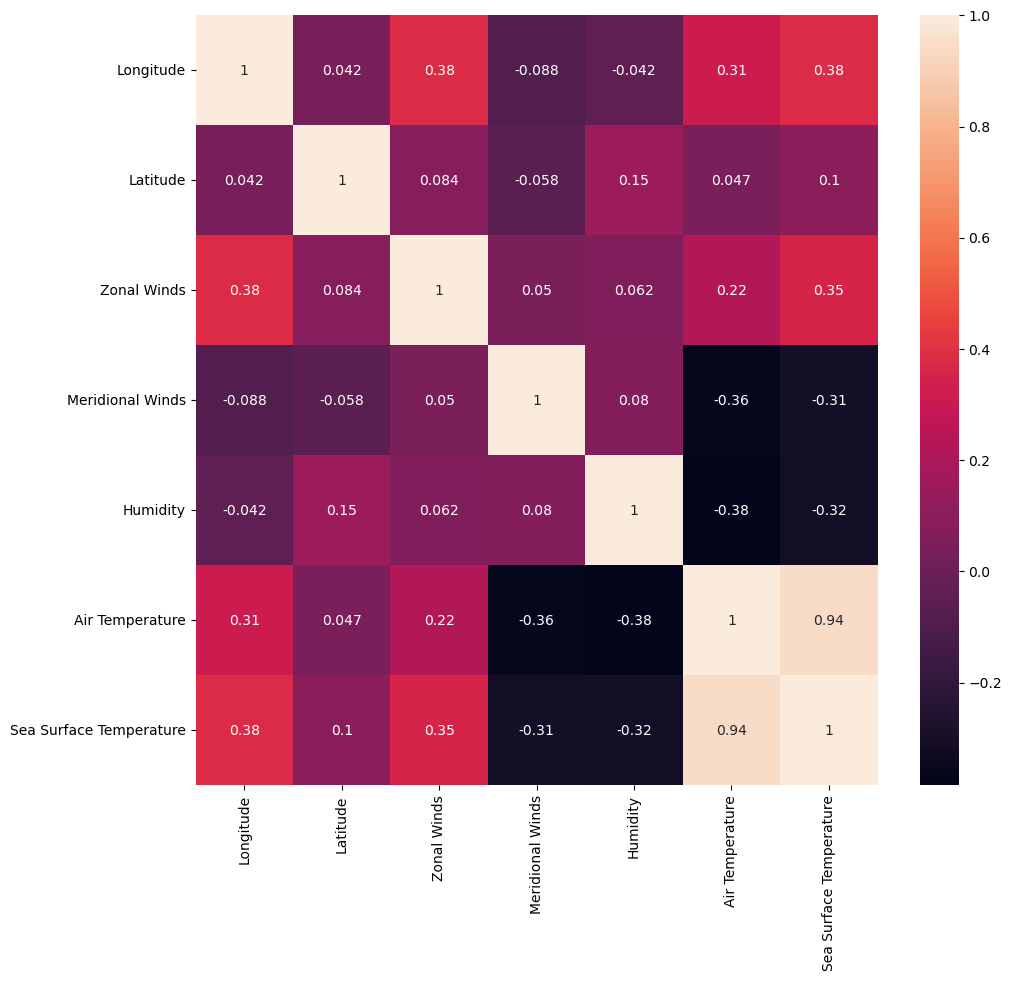

In [241]:
obs_var_mul = ['longitude', 'latitude', 'zonal_winds', 'meridional_winds', 'humidity', 'air_temperature', 'sea_surface_temperature']
obs_names_mul = ['Longitude', 'Latitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temperature', 'Sea Surface Temperature']
plt.figure(figsize = (11,10))
sns.heatmap(enso_dt[obs_var_mul].corr(), annot = True, xticklabels=obs_names_mul, yticklabels=obs_names_mul)
plt.show()

In [242]:
# plt.figure(figsize = (11,10))
# sns.pairplot(enso[obs_var_mul].reset_index())
# plt.show()

In [243]:
# for i in range(len(obs_var)):
#     plt.figure(figsize=(15,5))
#     enso[obs_var[i]].plot()
#     plt.title(obs_names[i]+'over time')
#     plt.show()

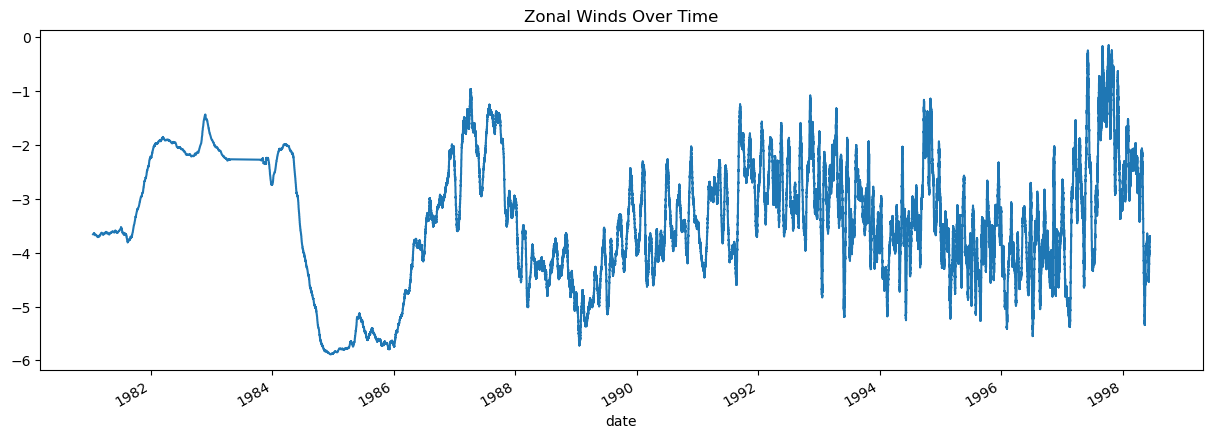

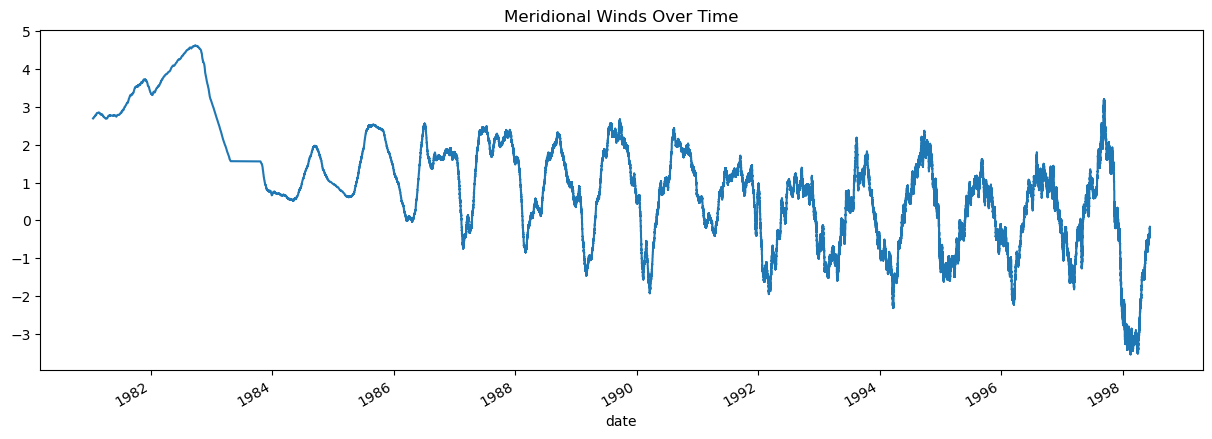

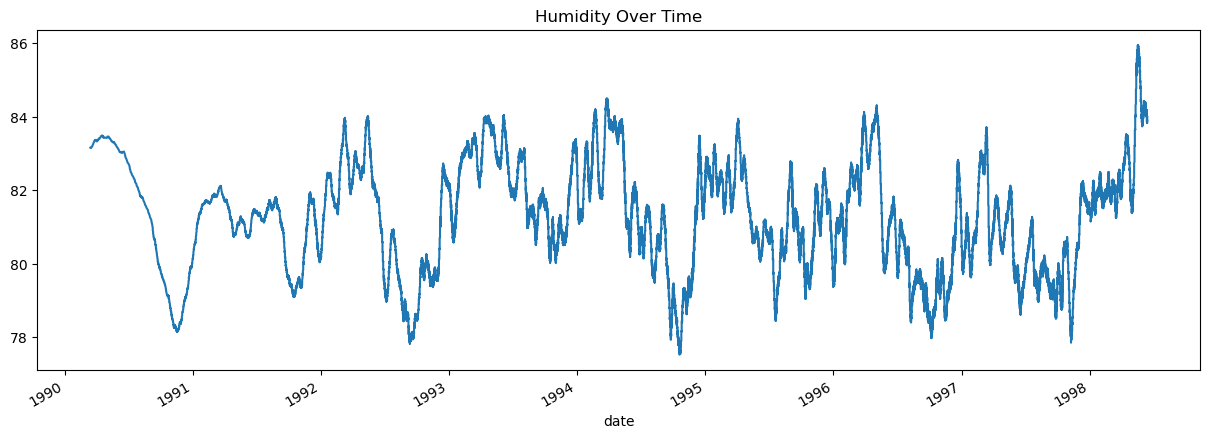

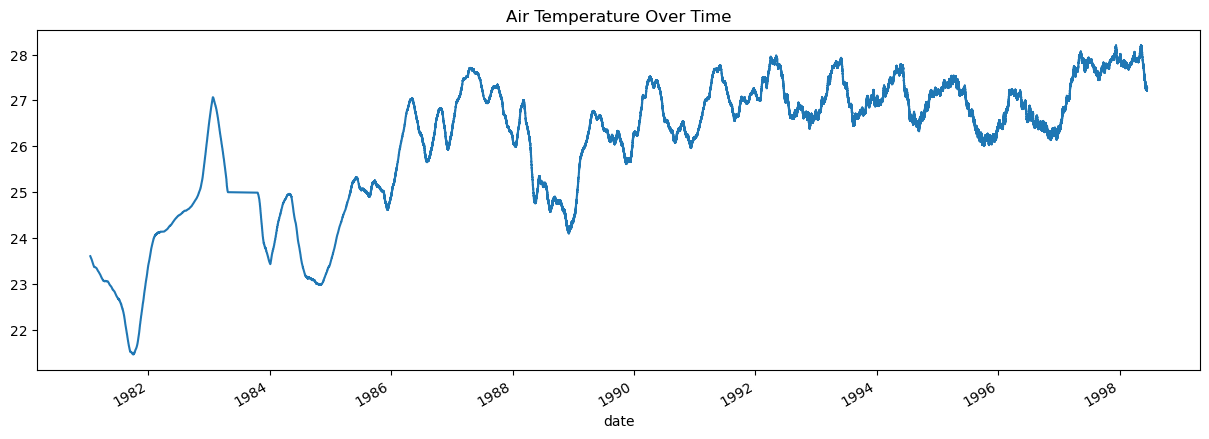

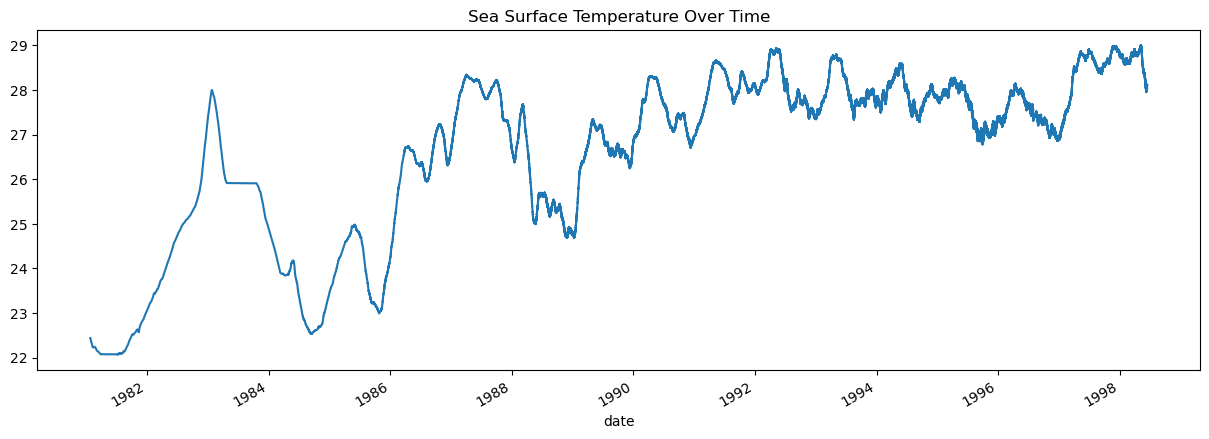

In [277]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in range(len(obs_var)):
    decomposition = seasonal_decompose(enso_dt[obs_var[i]].dropna(), period = 365)
    plt.figure(figsize=(15,5))
    decomposition.trend.plot()
    plt.title(obs_names[i]+' Over Time')
    plt.show()

### Data Preprocessing

#### Imputing missing values

* To impute missing values we will use `SimpleImputer` using the meadian for missing values.
* To scale the values we will use `QuantileTransformer` with a normal distribution as output.

In [285]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer

In [286]:
trans_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', QuantileTransformer(output_distribution='normal'))
]
)

### Model

In [287]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [289]:
iforest = IForest()
knn = KNN()
lof = LOF()

models = {'iforest':iforest,
          'knn':knn,
          'lof':lof
         }

for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('trans_pipeline', trans_pipeline),
        (model_name, model_info)
    ])
    pipeline.fit(enso_dt)
    labels = pipeline.steps[1][1].labels_
    num_outliers= len(enso_dt[labels==1])
    print('The '+model_name+' model has:'+str(num_outliers)+' anomalies')

The iforest model has:17812 anomalies
The knn model has:17812 anomalies
The lof model has:17812 anomalies


In [290]:
iforest = IForest()
if_pipeline = Pipeline(steps=[
    ('trans_pipeline', trans_pipeline),
    ('iforest', iforest)
])
display(if_pipeline)

Pipeline(steps=[('trans_pipeline',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('scale',
                                  QuantileTransformer(output_distribution='normal'))])),
                ('iforest',
                 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0))])

In [292]:
if_pipeline.fit(enso_dt)
labels = if_pipeline.steps[1][1].labels_
len(enso[labels==1])

17812

## ENSO Second Dataset

**Data Dictionary:**
* **Date** 
* **Year** 
* **Global Temperature Anomalies**
* **Niño 1+2 SST** - Sea surface temperature in Niño 1+2 region.
* **Niño 1+2 SST Anomalies** - Sea surface temperature anaomalies in Niño 1+2 region.
* **Niño 3 SST** - Sea surface temperature in Niño 3 region.
* **Niño 3 SST Anomalies** - Sea surface temperature anaomalies in Niño 3 region.
* **Niño 3.4 SST** - Sea surface temperature in Niño 3.4 region.
* **Niño 3.4 SST Anomalies** - Sea surface temperature anaomalies in Niño 3.4 region.
* **Niño 4 SST** - Sea surface temperature in Niño 4 region.
* **Niño 4 SST Anomalies** - Sea surface temperature anaomalies in Niño 4 region.
* **Niño 3 SST** - Sea surface temperature in Niño 3 region.
* **TNI** - Trans-Niño Index
* **PNA** - Pacific North America Pattern
* **OLR** - Outgoing Longwave Radiation
* **SOI** - Southern Oscillation Index
* **Season (2-Month)**
* **MEI.v2** - The bi-monthly Multivariate El Niño/Southern Oscillation index
* **Season (3-Month)**
* **ONI** - Oceanic niño index
* **Season (12-Month)**
* **ENSO Phase-Intensity** - Intensity of El Niño/La Niña event
    * WE - weak El Niño
    * ME - moderate El Niño
    * SE - strong El Niño
    * VSE - very strong El Niño
    * WL - weak La Niña
    * ML - moderate La Niña
    * SL - strong La Niña

### Data Validation

In [345]:
enso_oni = pd.read_csv('../data/ENSO.csv')

In [346]:
enso_oni.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1/1/1950,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,2/1/1950,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,3/1/1950,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,4/1/1950,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,5/1/1950,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [347]:
enso_oni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          882 non-null    object 
 1   Year                          882 non-null    int64  
 2   Month                         882 non-null    object 
 3   Global Temperature Anomalies  882 non-null    float64
 4   Nino 1+2 SST                  498 non-null    float64
 5   Nino 1+2 SST Anomalies        498 non-null    float64
 6   Nino 3 SST                    498 non-null    float64
 7   Nino 3 SST Anomalies          498 non-null    float64
 8   Nino 3.4 SST                  498 non-null    float64
 9   Nino 3.4 SST Anomalies        498 non-null    float64
 10  Nino 4 SST                    498 non-null    float64
 11  Nino 4 SST Anomalies          498 non-null    float64
 12  TNI                           875 non-null    float64
 13  PNA  

In [349]:
# Percentahe of missing values in each column
enso_oni.isna().sum() / len(enso_oni) * 100

Date                             0.000000
Year                             0.000000
Month                            0.000000
Global Temperature Anomalies     0.000000
Nino 1+2 SST                    43.537415
Nino 1+2 SST Anomalies          43.537415
Nino 3 SST                      43.537415
Nino 3 SST Anomalies            43.537415
Nino 3.4 SST                    43.537415
Nino 3.4 SST Anomalies          43.537415
Nino 4 SST                      43.537415
Nino 4 SST Anomalies            43.537415
TNI                              0.793651
PNA                              0.000000
OLR                             34.920635
SOI                              1.360544
Season (2-Month)                 0.000000
MEI.v2                          39.455782
Season (3-Month)                 0.000000
ONI                              0.000000
Season (12-Month)                0.000000
ENSO Phase-Intensity             0.680272
dtype: float64

* **Observations:**
* We notice that several columns have a large percentage of missing values; this missing values appear at the beginning of the table which means is not advisable to input them with some time series method like *forward filling* or *backward filling*. 
    * The ONI values which we will use to make our predictions is directly related to the sea surface temperature in the Niño 3.4 region we can safely drop all the SST columns since the information we need is already encoded in another column. 
    * The OLR and MEI.v2 columns have a large percentage of missing values since they are support metrics to detect El Niño events we can drop them. 
    * Year, Month and the Season columns are labels from the date which means we can safely drop them.
    * ENSO Phase-Intensity is defined from the ONI values, for that reason we will drop this columns as well.

In [350]:
col_to_drop = ['Year', 'Month', 'Nino 1+2 SST', 'Nino 1+2 SST Anomalies', 'Nino 3 SST', 'Nino 3 SST Anomalies', 'Nino 3.4 SST', 'Nino 3.4 SST Anomalies', 'Nino 4 SST',
              'Nino 4 SST Anomalies', 'OLR', 'Season (2-Month)', 'MEI.v2', 'Season (3-Month)', 'Season (12-Month)', 'ENSO Phase-Intensity']
enso_oni.drop(labels=col_to_drop, inplace=True, axis=1)

In [351]:
enso_oni.rename(columns = {'Date':'date', 'Global Temperature Anomalies':'gbt', 'TNI':'tni', 'PNA':'pna', 'SOI':'soi', 'ONI':'oni'}, inplace = True)

In [352]:
enso_oni['date'] = pd.to_datetime(enso_oni['date'])
enso_oni.sort_values(by='date')
enso_oni.head(1)

,date,gbt,tni,pna,soi,oni
0,1950-01-01,-0.2,0.624,-3.65,NaN,-1.5


In [353]:
enso_oni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    882 non-null    datetime64[ns]
 1   gbt     882 non-null    float64       
 2   tni     875 non-null    float64       
 3   pna     882 non-null    float64       
 4   soi     870 non-null    float64       
 5   oni     882 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 41.5 KB


In [354]:
# Searching for duplicated rows
print(enso_oni.duplicated().any())

False
